In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")
submission = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [4]:
import warnings
import numpy as np

# RuntimeWarning 무시
warnings.filterwarnings("ignore", category=RuntimeWarning)

train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [7]:
# 시드 설정
import random
np.random.seed(1234)
random.seed(1234)

# DataFrame의 모양 확인

shape를 활용해 행, 열의 갯수를 확인하고 전체적인 데이터프레임의 모양을 파악

In [8]:
print(train_df.shape)
print(test_df.shape)
print(submission.shape)

(891, 12)
(418, 11)
(418, 2)


In [10]:
# 셀에 출력할 크기를 지정
pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 50)

In [11]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [13]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## column들의 dtype 확인하기

data type에 따라 전처리 과정, 분석 방법이 다름. dtype에 따라 나눠 처리하기 위해 조회

### object : 문자열
### int, float : 수치데이터 -> 질적변수, 양적변수 
질적변수 : 분류를 위한 변수 - 수치 사이 간격이 **큰** 의미가 없는 경우임.
         ex) 분류를 위한 방 번호, 티켓번호
         
    명목 척도 : 분류를 위한 변수
    
    순서 척도 : 순서에 의미가 있는 변수 ex) 티켓 등급
    
양적변수 : 수치간 간격에 의미가 있는 변수
         ex) 나이, 요금 ...
         
    간격 척도 : 간격을 측정하는 것 ex) 온도 ...
    
    비례 척도 : 비율에 의미가 있는 것 ex) 연령, 가족 구성원 수 ...

In [32]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
# Describe: 수치데이터의 전체적인 통계 정보를 파악할 수 있음.
# train, test를 비교해 어느정도 차이를 확인할 수 있음.
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [34]:
# 각 열의 카디널리티를 확인할 수 있음.
'''
* 카디널리티 : 각 열의 고유값 갯수
낮은 카디널리티 - Sex, T/F와 같은 범주형 데이터일 확률이 높음.
높은 카디널리티 - Id와 같은 식별을 위한 질적변수일 확률이 높음
'''
train_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

Survived : target column
Pclass, Sex, SubSp, Parch, Embarked는 범주형 데이터의 가능성이 높음

In [19]:
# DataFrame에서 특정 열만 가져오는 것을 Series라고 함
train_df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [20]:
train_df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [30]:
train_df["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [31]:
train_df["SibSp"].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

# 데이터 시각화

## 범주형 데이터

범주형 데이터인 경우 카디널리티가 작기 때문에 바그래프 사용 용이함

In [38]:
#브라우저에서 즉각 시각화
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
columns = ["Embarked", "Survived", "PassengerId"]

# 이상치 제외 후 확인하기, unstack : 수직 데이터를 수평 데이터로 변환
embarked_df = train_df[columns].dropna().groupby(["Embarked", "Survived"]).count().unstack()
train_df[columns].dropna().groupby(["Embarked", "Survived"]).count()

PassengerId
Embarked Survived             
C        0                  75
         1                  93
Q        0                  47
         1                  30
S        0                 427
         1                 217

In [57]:
embarked_df

PassengerId     
Survived           0    1
Embarked                 
C                 75   93
Q                 47   30
S                427  217

<Axes: title={'center': 'stacked=True'}, xlabel='Embarked'>

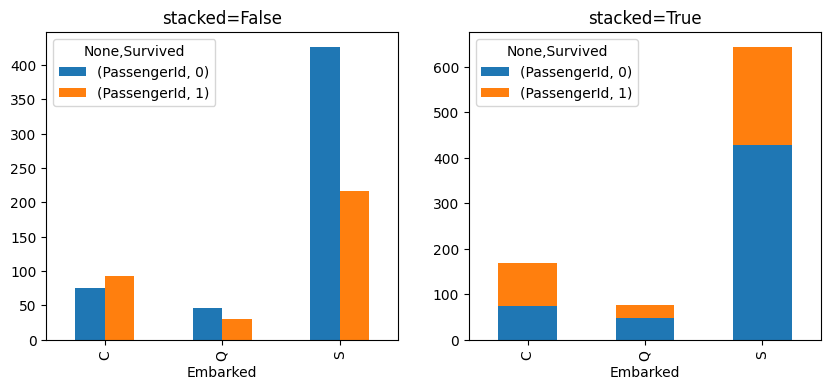

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# stacked = 각 바 그래프에 누적해서 그리기
embarked_df.plot.bar(stacked=False, ax=axes[0], title="stacked=False")
embarked_df.plot.bar(stacked=True, ax=axes[1], title="stacked=True")

In [63]:
embarked_df["death_rate"] = embarked_df.iloc[:, 0] / (embarked_df.iloc[:, 0] + embarked_df.iloc[:, 1])
embarked_df["survived_rate"] = embarked_df.iloc[:, 1] / (embarked_df.iloc[:, 0] + embarked_df.iloc[:, 1])

In [64]:
embarked_df

PassengerId      survived_rate death_rate
Survived           0    1                         
Embarked                                          
C                 75   93      0.553571   0.446429
Q                 47   30      0.389610   0.610390
S                427  217      0.336957   0.663043

<Axes: title={'center': 'Survived By Sex'}, xlabel='Sex'>

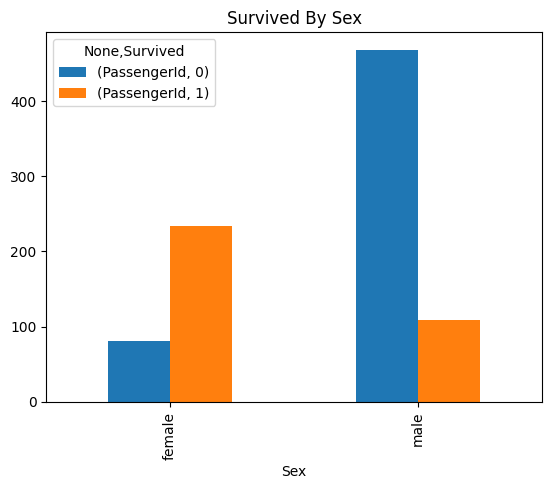

In [68]:
sex_df = train_df[["Sex", "Survived", "PassengerId"]].dropna().groupby(["Sex", "Survived"]).count().unstack()
sex_df.plot.bar(title="Survived By Sex")

<Axes: title={'center': 'Survived by Ticket'}, xlabel='Pclass'>

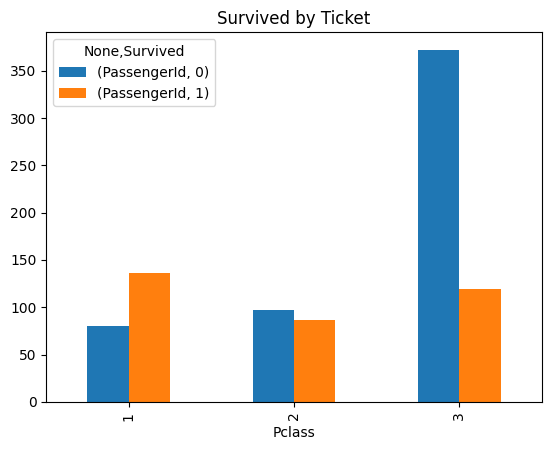

In [69]:
ticket_df = train_df[["Pclass", "Survived", "PassengerId"]].dropna().groupby(["Pclass", "Survived"]).count().unstack()
ticket_df.plot.bar(title = "Survived by Ticket")

카데고리 변수를 머신러닝 처리하기 위한 수치데이터로 변환하기

In [74]:
# get_dummies 사용
# 지정 column을 one hot encoing으로 변환해줌
train_df_corr = pd.get_dummies(train_df, columns = ["Sex"], drop_first=True)
train_df_corr = pd.get_dummies(train_df_corr, columns = ["Embarked"])
train_df_corr.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,False,True


## 연속형 변수
연속형 변수인 경우 카디널리티가 높은 경우가 많기 때문에 히스토그램, 박스 플룻 사용 용이

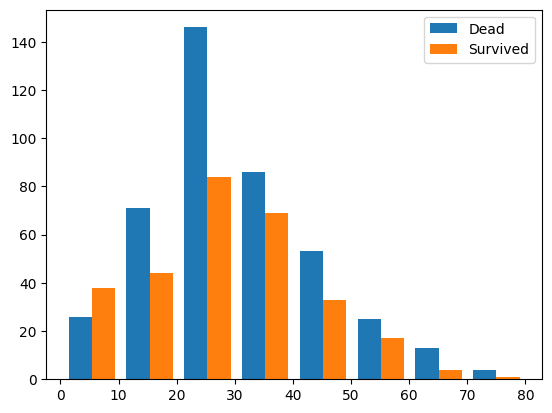

In [71]:
dead = train_df.Age[train_df.Survived == 0]
survived = train_df.Age[train_df.Survived == 1]

plt.hist(x=[dead, survived], bins=8 , histtype="bar", label=["Dead", "Survived"])
plt.legend()

## 각 변수 별 상관관계 알아보기
히트맵사용

In [84]:
train_df_corr.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Sex_male          bool
Embarked_C        bool
Embarked_Q        bool
Embarked_S        bool
dtype: object

In [85]:
# numerical한 변수만 선택 후 피어슨 상관계수로 각 column 별 상관관계 해석
train_corr = train_df_corr.select_dtypes(include=["number", "bool"]).corr()
train_corr.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.042939,-0.001205,-0.033606,0.022148
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.543351,0.168240,0.003650,-0.155660
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.131900,-0.243292,0.221009,0.081720
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254,0.036261,-0.022405,-0.032523
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.114631,-0.059528,-0.026354,0.070941


<Axes: >

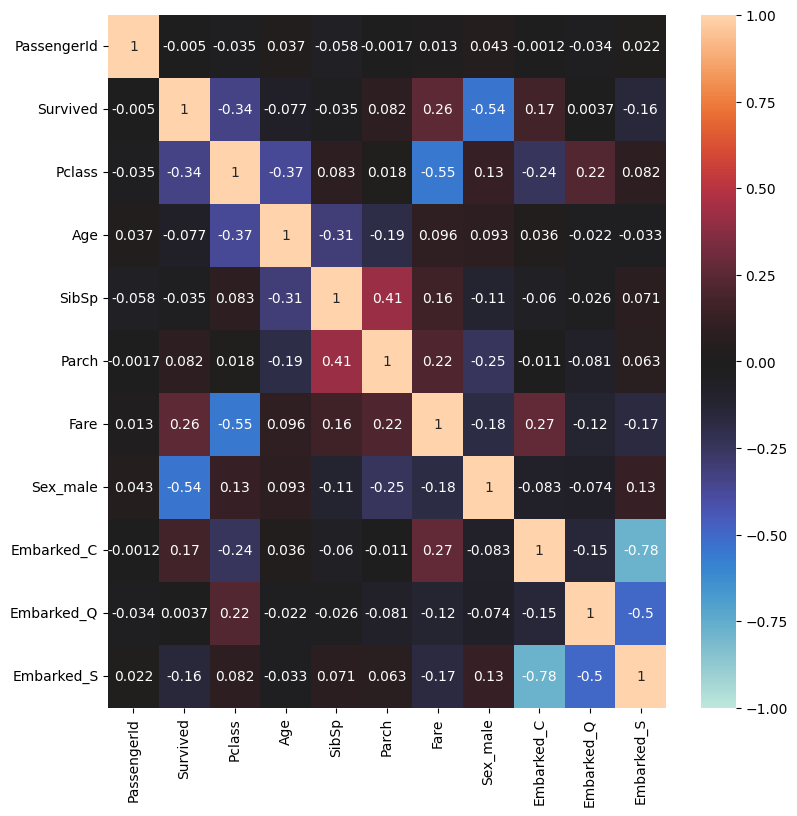

In [86]:
plt.figure(figsize=(9, 9))
sns.heatmap(train_corr, vmax=1, vmin=-1, center=0, annot = True)

Survived와 가장 상관관계가 높은 것은 절대값이 큰 Sex_male임.

column이 Sex_male이기 때문에 여자일수록 가장 생존율이 높다고 유추할 수 잇음.

survived와 Sex가 가장 linear한 관계이라고 해석가능하지만 원인-결과는 아님